In [1]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt



In [141]:
print(torch.__version__)
print(torchvision.__version__)


2.7.1
0.22.1


In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# get a dataset from MNIST modified national institute of standards and technology database available since 1998
# we are going to use fashion mnist

train_data = datasets.FashionMNIST(
    root='data', # where to download data to? here ./data folder to save them
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
type(train_data), type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [146]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [147]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [148]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [149]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [150]:
type(train_data.train_labels)


/Users/mikeqin/code/ml-training/venv/lib/python3.12/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Tensor

In [151]:
train_data.train_labels.shape

torch.Size([60000])

In [152]:
torch.bincount(train_data.train_labels)

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

Text(0.5, 1.0, 'Ankle boot')

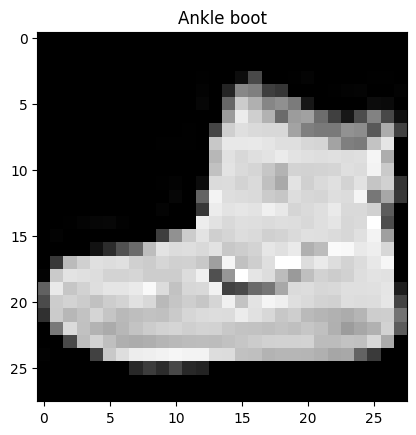

In [153]:
#visualize data
image, label = train_data[0]
#plt.imshow(image.reshape(28,28,1))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(test_data.classes[label])

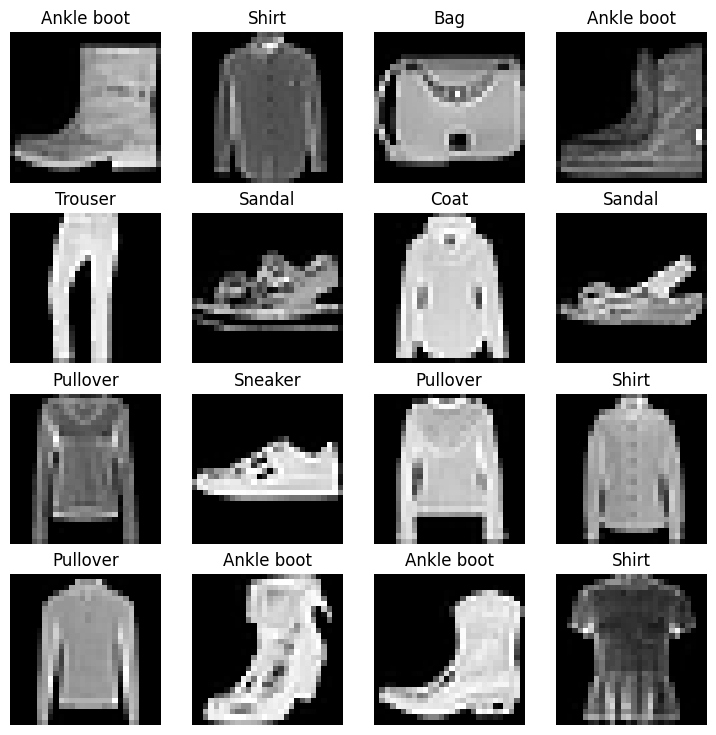

In [154]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))

rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data),size=(1,)).item() # or size[1]
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False)


In [155]:
# do you think these items of clothinng could be modelled wiht pure linear lines?

In [156]:
# check the data:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
# using DataLoader 
#
# keep in mind of mini-batches:
# 1. it is more computationally efficient as in your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 (batch size) images at a time 
# 2. it gives our neural network more chances to update its gradients per epoch
#

from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn dataset into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x106651f40>,
 <torch.utils.data.dataloader.DataLoader at 0x12768f9b0>)

In [158]:
print(f"length of train_dataloader: {len(train_dataloader)}")
print(f"length of test_dataloader: {len(test_dataloader)}")

length of train_dataloader: 1875
length of test_dataloader: 313


In [159]:
60000/32, 10000/32

(1875.0, 312.5)

In [160]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

iamge size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


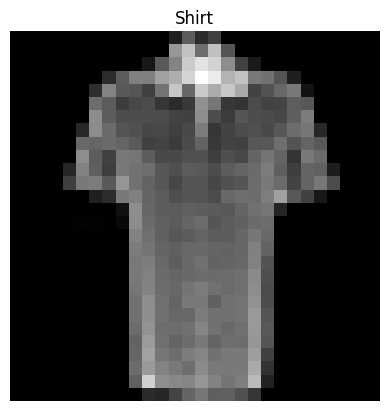

In [161]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(train_data.classes[label])
plt.axis(False);
print(f"iamge size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

### Build a model

In [162]:
# build a model
# start with a baseline model 

# because we will build the baseline using linear, we need to flatten the data because linear cannot handle multi dimentional 
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [163]:
#flatten the sample
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [24]:
# baseline model:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [25]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=10, output_shape=len(train_data.classes)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [166]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [167]:
# using dumpy data to do a dumpy forward pass to run through the loop to see our model data shape match
dummy_x = torch.rand([1,28,28])
dummy_x

tensor([[[0.0851, 0.8142, 0.2461, 0.7762, 0.4256, 0.2940, 0.8762, 0.4034,
          0.2302, 0.4234, 0.1820, 0.0186, 0.4124, 0.4718, 0.2150, 0.9432,
          0.3883, 0.3730, 0.8962, 0.5556, 0.3824, 0.6150, 0.0482, 0.9916,
          0.6319, 0.6758, 0.1312, 0.8823],
         [0.0891, 0.3263, 0.1794, 0.2475, 0.6067, 0.0041, 0.0105, 0.6142,
          0.6648, 0.5072, 0.3100, 0.3601, 0.4309, 0.3986, 0.1907, 0.8764,
          0.6012, 0.1655, 0.3984, 0.1382, 0.2079, 0.8798, 0.6526, 0.7190,
          0.4351, 0.3752, 0.5646, 0.1448],
         [0.0025, 0.8515, 0.5102, 0.8033, 0.8762, 0.7187, 0.3291, 0.4083,
          0.4739, 0.5299, 0.5194, 0.1091, 0.2251, 0.8644, 0.5160, 0.2733,
          0.8380, 0.3516, 0.2966, 0.8494, 0.1055, 0.2605, 0.8784, 0.4511,
          0.2938, 0.9149, 0.5761, 0.0302],
         [0.1303, 0.3732, 0.4726, 0.1235, 0.3116, 0.6690, 0.0337, 0.0314,
          0.6300, 0.5954, 0.0171, 0.0348, 0.9154, 0.9990, 0.2815, 0.9981,
          0.8453, 0.9444, 0.2848, 0.3776, 0.7948, 0.6855,

In [168]:
dumpy_pred = model_0(dummy_x)

# output logits
dumpy_pred

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [169]:
dumpy_pred.shape

torch.Size([1, 10])

In [170]:
# note that we are not going to tell the model which features that our images have: a handle, an edge, or whatever the details which are all features of our images. but we won't tell the model about it
# it is nn's job to figure these out. These features are all wrapped in the tensors of the shape of height, width and color channel 



### Training loop and testing loop

In [171]:
# start to writing training loop and testing loop. Preparation first:

In [34]:
# Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [173]:
# get accuracy function - we can implement it ourself, or use a shared one like this:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
    print("helper function exists")
else:
    print("downloading helper_functions.py...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py") as f:
        f.write(request.content)
    


helper function exists


In [6]:
from helper_functions import accuracy_fn

In [8]:
# creating a function to time our experiments. Two of the main things we often want to track:
# 1. model performance: loss and accuracy
# 2. how fast it runs
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    total_tine = end - start
    print(f"Train time on {device}: {total_tine:.3f} seconds")
    #do we need this return?
    return total_tine


# quich test of the function
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.950003206729889e-05

**The optimizer will update a model's parameters once per batch rather than once per epoch!!!!**

In [ ]:
# steps
# 1. loop through epoches
# 2. loop through batches: perform training here, calculate loss per batch
# 3. loop through testing batches, perform testing steps calculate the teset loss per patch

# !!!! RESET optimizer OTHERWISE it will keep the state and cause bad performance!!!!
#import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start = timer()

EPOCHS = 3 # keep this small for faster training time


for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-----")
    # training
    training_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred,y)
        training_loss += loss

        optimizer.zero_grad()
        loss.backward()

        # optimizer parameters per batch
        optimizer.step()
    
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader)} samples")

    # epoch level
    training_loss /= len(train_dataloader)

    # testing loop
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # have to adjust these values inside of the interence mode otherwise torch will report an error
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\Train loss: {training_loss:.4f}, Test loss: {test_loss:4f}, Test acc: {test_acc:2f}%")
    
train_time_end = timer()
print_train_time(start=train_time_start, end=train_time_end, device=str(next(model_0.parameters()).device))


<>:57: SyntaxWarning: invalid escape sequence '\T'
<>:57: SyntaxWarning: invalid escape sequence '\T'
/var/folders/mr/0thp3_d163g2xzs6jh5ppg4m0000gn/T/ipykernel_46229/1136240670.py:57: SyntaxWarning: invalid escape sequence '\T'
  print(f"\Train loss: {training_loss:.4f}, Test loss: {test_loss:4f}, Test acc: {test_acc:2f}%")
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples


 33%|███▎      | 1/3 [00:01<00:03,  1.72s/it]

\Train loss: 0.5904, Test loss: 0.509535, Test acc: 82.038738%
Epoch: 1
-----
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples


 67%|██████▋   | 2/3 [00:03<00:01,  1.65s/it]

\Train loss: 0.4763, Test loss: 0.479890, Test acc: 83.196885%
Epoch: 2
-----
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples


100%|██████████| 3/3 [00:04<00:00,  1.66s/it]

\Train loss: 0.4550, Test loss: 0.476639, Test acc: 83.426518%
Train time on cpu: 4.970 seconds


4.969844582956284

In [177]:
# Now we have our baseline to improve on.

In [22]:
# Evaluate our model
import torch.utils.data.dataloader


torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, # loss function is a Module too!
               accuracy_fn):
    loss, accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader, colour='green'): # <-- add a progress bars
            y_pred = model(X)
            
            loss += loss_fn(y_pred, y)
            accuracy += accuracy_fn(y, y_pred.argmax(dim=1))

        loss /= len(data_loader)
        accuracy /= len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": accuracy}


In [39]:
model_0_result = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_result

100%|██████████| 313/313 [00:00<00:00, 1462.41it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [180]:
# when enumerate, we enumerate batch by batch...
for batch, (X, y) in enumerate(test_dataloader):
   if batch % 10 == 0:
      print(f"at batch {batch}")
      print(f"size of X: {len(X)}, size of y: {len(y)}")

   

at batch 0
size of X: 32, size of y: 32
at batch 10
size of X: 32, size of y: 32
at batch 20
size of X: 32, size of y: 32
at batch 30
size of X: 32, size of y: 32
at batch 40
size of X: 32, size of y: 32
at batch 50
size of X: 32, size of y: 32
at batch 60
size of X: 32, size of y: 32
at batch 70
size of X: 32, size of y: 32
at batch 80
size of X: 32, size of y: 32
at batch 90
size of X: 32, size of y: 32
at batch 100
size of X: 32, size of y: 32
at batch 110
size of X: 32, size of y: 32
at batch 120
size of X: 32, size of y: 32
at batch 130
size of X: 32, size of y: 32
at batch 140
size of X: 32, size of y: 32
at batch 150
size of X: 32, size of y: 32
at batch 160
size of X: 32, size of y: 32
at batch 170
size of X: 32, size of y: 32
at batch 180
size of X: 32, size of y: 32
at batch 190
size of X: 32, size of y: 32
at batch 200
size of X: 32, size of y: 32
at batch 210
size of X: 32, size of y: 32
at batch 220
size of X: 32, size of y: 32
at batch 230
size of X: 32, size of y: 32
at 

### Done with a model baseline

### Adding Non-linearity

Next, impromvement:
1. GPU
2. Non linearity: add activation after layers
3. maybe more data or quality data


In [28]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),# into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [29]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28, hidden_units=10, output_shape=len(train_data.classes)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [36]:
# Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [18]:
from helper_functions import accuracy_fn

In [37]:
#import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start = timer()

EPOCHS = 3 # keep this small for faster training time

# !!!! RESET optimizer OTHERWISE it will keep the state and cause bad performance!!!!

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-----")
    # training
    training_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train()

        y_pred = model_1(X)

        loss = loss_fn(y_pred,y)
        training_loss += loss

        optimizer.zero_grad()
        loss.backward()

        # optimizer parameters per batch
        optimizer.step()
    
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader)} samples")

    # epoch level
    training_loss /= len(train_dataloader)

    # testing loop
    test_loss, test_acc = 0,0
    model_1.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_1(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))


        # have to adjust these values inside of the interence mode otherwise torch will report an error
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Train loss: {training_loss:.4f}, | Test loss: {test_loss:4f}, Test acc: {test_acc:2f}%")
    
train_time_end = timer()
print_train_time(start=train_time_start, end=train_time_end, device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples


 33%|███▎      | 1/3 [00:01<00:03,  1.73s/it]

Train loss: 0.6461, | Test loss: 0.538550, Test acc: 80.760783%
Epoch: 1
-----
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples


 67%|██████▋   | 2/3 [00:03<00:01,  1.68s/it]

Train loss: 0.4809, | Test loss: 0.493897, Test acc: 82.458067%
Epoch: 2
-----
Looked at 0/1875 samples
Looked at 12800/1875 samples
Looked at 25600/1875 samples
Looked at 38400/1875 samples
Looked at 51200/1875 samples


100%|██████████| 3/3 [00:04<00:00,  1.66s/it]

Train loss: 0.4469, | Test loss: 0.457464, Test acc: 83.985623%
Train time on cpu: 4.995 seconds


4.9948379579000175

In [38]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 1463.18it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

### getting into Convolutional Neural Network (CNN)

In [16]:
# google for popular CNN architecture
# tinyVGG, ResNet, ....

# here we are trying to simulate the same as https://poloclub.github.io/cnn-explainer/

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=490,
                      out_features=len(train_data.classes))
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"shape after conv_block 1: {x.shape}")
        
        x = self.conv_block_2(x)
        #print(f"shape after conv_block 2: {x.shape}")

        x = self.classifier(x)
        #print(f"shape after classifier: {x.shape}")
        return x

In [17]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(train_data.classes)).to(device)

learn nn.Conv2d

In [67]:
# learn about nn.Conv2d
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))

test_image = images[0]
#create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=10, 
                       kernel_size=3, # same as (3,3)
                       stride=1, 
                       padding=0)

# pass data
conv_output = conv_layer(test_image)#.unsqueeze(0))
conv_output.shape

torch.Size([10, 62, 62])

learn nn.MaxPool2d

In [44]:
# learn about nn.MaxPool2d
test_image.shape

torch.Size([3, 64, 64])

In [47]:
max_pool = nn.MaxPool2d(kernel_size=2)
max_pool_output = max_pool(conv_output)
max_pool_output.shape

torch.Size([10, 31, 31])

In [51]:
# apply to a 2 by 2 pixels:
torch.manual_seed(42)
rand_tensor = torch.randn(size=(1,1,2,2))
rand_tensor

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [52]:
max_p = nn.MaxPool2d(kernel_size=2)
max_p_output = max_p(rand_tensor)

# see the reduced size:
max_p_output.shape

torch.Size([1, 1, 1, 1])

In [53]:
# see the max value
max_p_output 

tensor([[[[0.3367]]]])

back to our model

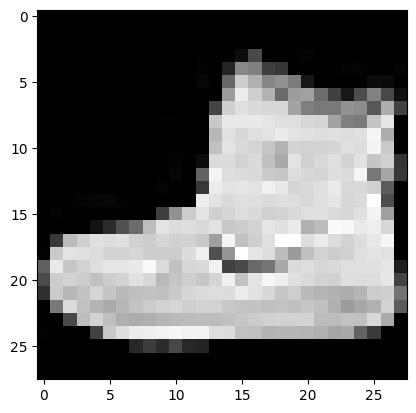

In [61]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')

In [63]:
image.shape

torch.Size([1, 28, 28])

In [85]:
model_2(image.unsqueeze(0))

shape after conv_block 1: torch.Size([1, 10, 14, 14])
shape after conv_block 2: torch.Size([1, 10, 7, 7])
shape after classifier: torch.Size([1, 10])


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### train loop

In [11]:
# copied
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [18]:
from tqdm.auto import tqdm
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [19]:
torch.manual_seed(42)
from timeit import default_timer as timer

train_model_2_start = timer()

epochs = 3

for epoch in tqdm(range(epochs), colour='green'):
    print(f"Epoch: {epoch}\n--------")
    train_step(model_2,
               train_dataloader,
               loss_fn,
               optimizer,
               accuracy_fn)
    test_step(test_dataloader,
              model_2,
              loss_fn,
              accuracy_fn)
    
train_model_2_end = timer()

print_train_time(train_model_2_start,train_model_2_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.59718 | Train accuracy: 78.37%


 33%|███▎      | 1/3 [00:20<00:40, 20.38s/it]

Test loss: 0.39271 | Test accuracy: 86.07%

Epoch: 1
--------
Train loss: 0.36101 | Train accuracy: 87.07%


 67%|██████▋   | 2/3 [00:40<00:20, 20.50s/it]

Test loss: 0.35492 | Test accuracy: 86.88%

Epoch: 2
--------
Train loss: 0.32423 | Train accuracy: 88.29%


100%|██████████| 3/3 [01:01<00:00, 20.53s/it]

Test loss: 0.32574 | Test accuracy: 88.12%

Train time on None: 61.599 seconds


61.59860174986534

In [23]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn,accuracy_fn)
model_2_results

100%|██████████| 313/313 [00:00<00:00, 460.39it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32574188709259033,
 'model_acc': 88.11900958466454}

### compare results

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_result, model_1_results, model_2_results])
# should add another column of training time: compare_results["training_time"] = [time0, time1, time2] <-- I don't have these numbers at this time..
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.457464,83.985623
2,FashionMNISTModelV2,0.325742,88.119010


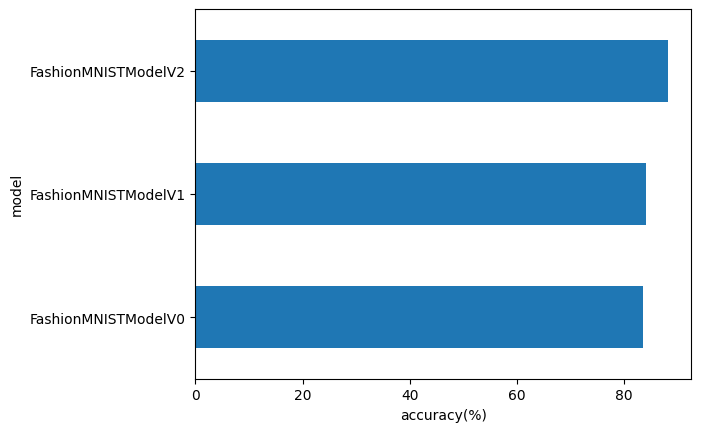

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh") # <-- bar, horizontal
plt.xlabel("accuracy(%)")
plt.ylabel("model");

could try difference thing now:
kernel size
more hidden_units
more conv blocks i.e. more hidden layers
longer epochs
...

In [ ]:
import torchmetrics
import mlxtend
# for confusion matrix....

In [49]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
SAVE_PATH = MODEL_PATH / "vision.pth"
torch.save(obj=model_2.state_dict(), f= SAVE_PATH)

In [50]:
load_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10)

In [53]:
load_model_2.load_state_dict(torch.load(f=SAVE_PATH)) 

# should test to verify prediction agin to make sure nothing is lost during saving and loading

torch.isclose()
# note: it is normal to have a descrepcy/tiny difference 

TypeError: isclose() missing 2 required positional argument: "input", "other"